In [402]:
import numpy as np
import pandas as pd

import os
os.chdir(r'D:\Downloads\ML-20240706T050210Z-001\ML\extractme')

import warnings
warnings.filterwarnings('ignore')

# Section 1: Price Prediction

In [403]:
df = pd.read_csv('vehicles.csv')

In [404]:
df.shape

(258888, 26)

In [405]:
df.columns

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [406]:
df.head()

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


# Handle missing values appropriately.

In [407]:
df.isnull().sum()/len(df)*100

ad_title                 0.000000
ad_description           0.002704
details                 39.933485
slug                     0.000000
title                    0.000000
type                     0.000000
price                    1.472065
timestamp                0.002318
posted_date              0.002318
deactivation_date        0.002318
category                 0.000000
parent_category          0.000000
location                 0.000000
geo_region               0.000000
area                     0.000000
is_delivery_free         0.000000
is_doorstep_delivery     0.000000
is_dsd_applicable        0.000000
is_member                3.495720
is_authorized_dealer     3.495720
is_featured_member       3.495720
is_verified              0.000000
membership_level         0.000000
member_since            58.038225
properties               0.000000
user                     0.000000
dtype: float64

In [408]:
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [329]:
df = df.drop(columns=['ad_title','ad_description','slug','title','timestamp','posted_date','deactivation_date','parent_category','is_delivery_free','is_doorstep_delivery','is_dsd_applicable','user'])

In [330]:
df.shape

(258888, 14)

In [332]:
unique_type = df['type'].unique()
unique_type

array(['for_sale', 'to_buy'], dtype=object)

In [333]:
df = df[df['type'] != 'to_buy']

In [334]:
unique_type = df['type'].unique()
unique_type

array(['for_sale'], dtype=object)

In [335]:
df = df.drop(columns=['type'])

In [336]:
df.isnull().sum()

details                 102226
price                     2654
category                     0
location                     0
geo_region                   0
area                         0
is_member                 9039
is_authorized_dealer      9039
is_featured_member        9039
is_verified                  0
membership_level             0
member_since            149113
properties                   0
dtype: int64

In [337]:
df['is_member'].fillna(df['is_member'].mode()[0], inplace=True)
df['is_authorized_dealer'].fillna(df['is_authorized_dealer'].mode()[0], inplace=True)
df['is_featured_member'].fillna(df['is_featured_member'].mode()[0], inplace=True)

In [338]:
df.isnull().sum()

details                 102226
price                     2654
category                     0
location                     0
geo_region                   0
area                         0
is_member                    0
is_authorized_dealer         0
is_featured_member           0
is_verified                  0
membership_level             0
member_since            149113
properties                   0
dtype: int64

# Encode categorical variables.

In [339]:
bool_df = df[['is_member','is_authorized_dealer','is_featured_member','is_verified']]
bool_df

,is_member,is_authorized_dealer,is_featured_member,is_verified
0,True,False,False,True
1,True,False,False,True
2,True,False,False,True
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
258883,False,False,False,False
258884,False,False,False,False
258885,False,False,False,False
258886,True,False,False,False


In [340]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to boolean columns
for column in bool_df.columns:
    bool_df[column] = label_encoder.fit_transform(bool_df[column])

In [341]:
bool_df

,is_member,is_authorized_dealer,is_featured_member,is_verified
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
258883,0,0,0,0
258884,0,0,0,0
258885,0,0,0,0
258886,1,0,0,0


In [342]:
df = df.drop(columns=['is_member','is_authorized_dealer','is_featured_member','is_verified'])
df.shape

(257731, 9)

In [343]:
df = pd.concat([df,bool_df], axis=1)
df

,details,price,category,location,geo_region,area,membership_level,member_since,properties,is_member,is_authorized_dealer,is_featured_member,is_verified
0,NaN,"Rs 18,000",Auto Parts & Accessories,Maharagama,LK-11,"{'id': 1506, 'name': 'Colombo'}",premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",1,0,0,1
1,NaN,"Rs 67,000",Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",1,0,0,1
2,NaN,"Rs 85,000",Auto Parts & Accessories,Kotte,LK-11,"{'id': 1506, 'name': 'Colombo'}",plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",1,0,0,1
3,NaN,"Rs 47,000",Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",1,0,0,0
4,NaN,"Rs 9,000",Auto Parts & Accessories,Kottawa,LK-11,"{'id': 1506, 'name': 'Colombo'}",plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258883,"140,000 km","Rs 1,030,000",Cars,Jaffna City,LK-41,"{'id': 1605, 'name': 'Jaffna'}",free,NaN,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",0,0,0,0
258884,"219,000 km","Rs 3,550,000",Cars,Battaramulla,LK-11,"{'id': 1506, 'name': 'Colombo'}",free,NaN,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",0,0,0,0
258885,NaN,"Rs 70,000",Rentals,Colombo 3,LK-11,"{'id': 1506, 'name': 'Colombo'}",free,NaN,{'Service type': 'Car Rentals'},0,0,0,0
258886,"30,000 km","Rs 7,250,000",Cars,Boralesgamuwa,LK-11,"{'id': 1506, 'name': 'Colombo'}",premium,December 2019,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",1,0,0,0


In [344]:
df.dtypes

details                 object
price                   object
category                object
location                object
geo_region              object
area                    object
membership_level        object
member_since            object
properties              object
is_member                int64
is_authorized_dealer     int64
is_featured_member       int64
is_verified              int64
dtype: object

In [346]:
df['price']

0            Rs 18,000
1            Rs 67,000
2            Rs 85,000
3            Rs 47,000
4             Rs 9,000
              ...     
258883    Rs 1,030,000
258884    Rs 3,550,000
258885       Rs 70,000
258886    Rs 7,250,000
258887      Rs 135,000
Name: price, Length: 257731, dtype: object

In [347]:
# Step 1: Remove the "Rs" and commas
df['price'] = df['price'].str.replace('Rs ', '').str.replace(',', '')

In [348]:
df['price']

0           18000
1           67000
2           85000
3           47000
4            9000
           ...   
258883    1030000
258884    3550000
258885      70000
258886    7250000
258887     135000
Name: price, Length: 257731, dtype: object

In [349]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [350]:
df['price'].dtype

dtype('float64')

In [351]:
df.isnull().sum()

details                 102226
price                     4327
category                     0
location                     0
geo_region                   0
area                         0
membership_level             0
member_since            149113
properties                   0
is_member                    0
is_authorized_dealer         0
is_featured_member           0
is_verified                  0
dtype: int64

In [352]:
skewness = df['price'].skew()
skewness

96.53367533341346

In [353]:
# Calculate the median price for each category
category_median_prices = df.groupby('category')['price'].median()

# Function to fill missing prices based on the category median
def fill_missing_prices(row):
    if pd.isnull(row['price']):
        return category_median_prices[row['category']]
    else:
        return row['price']

# Apply the function to fill missing prices
df['price'] = df.apply(fill_missing_prices, axis=1)

In [354]:
df.isnull().sum()

details                 102226
price                        0
category                     0
location                     0
geo_region                   0
area                         0
membership_level             0
member_since            149113
properties                   0
is_member                    0
is_authorized_dealer         0
is_featured_member           0
is_verified                  0
dtype: int64

In [355]:
df = df.drop(columns=['area'])

In [149]:
df.to_csv('D:/Downloads/df1exam0.csv')

In [356]:
df = df.drop(columns=['details','member_since'])

In [357]:
df.isnull().sum()

price                   0
category                0
location                0
geo_region              0
membership_level        0
properties              0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
dtype: int64

In [358]:
df.shape

(257731, 10)

In [359]:
unique_type = df['category'].unique()
unique_type

array(['Auto Parts & Accessories', 'Cars', 'Auto Services', 'Rentals',
       'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [360]:
values_to_drop = ['Auto Parts & Accessories', 'Auto Services', 'Rentals']
df_new = df[~df['category'].isin(values_to_drop)]
df_new

,price,category,location,geo_region,membership_level,properties,is_member,is_authorized_dealer,is_featured_member,is_verified
31,22000000.0,Cars,Nugegoda,LK-11,plus,"{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Tr...",1,0,0,1
1349,14500000.0,Cars,Kohuwala,LK-11,premium,"{'Brand': 'Toyota', 'Model': 'CHR', 'Year of M...",1,0,0,1
1701,10500000.0,Cars,Kohuwala,LK-11,premium,"{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / E...",1,0,0,1
1702,6500000.0,Cars,Kohuwala,LK-11,plus,"{'Brand': 'Daihatsu', 'Model': 'Atrai Wagon', ...",1,0,0,1
1917,11500000.0,Cars,Colombo 14,LK-11,plus,"{'Brand': 'Mercedes Benz', 'Model': 'C180', 'Y...",1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
258881,12985000.0,Cars,Negombo,LK-12,free,"{'Brand': 'Toyota', 'Model': 'CHR', 'Trim / Ed...",0,0,0,0
258883,1030000.0,Cars,Jaffna City,LK-41,free,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",0,0,0,0
258884,3550000.0,Cars,Battaramulla,LK-11,free,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",0,0,0,0
258886,7250000.0,Cars,Boralesgamuwa,LK-11,premium,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",1,0,0,0


In [361]:
df.dtypes

price                   float64
category                 object
location                 object
geo_region               object
membership_level         object
properties               object
is_member                 int64
is_authorized_dealer      int64
is_featured_member        int64
is_verified               int64
dtype: object

In [362]:
df1 = df_new.copy()

In [363]:
df1.shape

(171362, 10)

In [364]:
# Function to extract properties
def extract_properties(row, property_name):
    return row.get(property_name, 'null')

# Convert properties column to dictionaries if they are in string format
df1['properties'] = df1['properties'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract properties into new columns
df1['Brand'] = df1['properties'].apply(lambda x: extract_properties(x, 'Brand'))
df1['Condition'] = df1['properties'].apply(lambda x: extract_properties(x, 'Condition'))
df1['Model'] = df1['properties'].apply(lambda x: extract_properties(x, 'Model'))
df1['Year of Manufacture'] = df1['properties'].apply(lambda x: extract_properties(x, 'Year of Manufacture'))
df1['Model year'] = df1['properties'].apply(lambda x: extract_properties(x, 'Model year'))
df1['Engine capacity'] = df1['properties'].apply(lambda x: extract_properties(x, 'Engine capacity'))
df1['Mileage'] = df1['properties'].apply(lambda x: extract_properties(x, 'Mileage'))

# Combine 'Year of Manufacture' and 'Model year' into a single column
df1['Year'] = df1.apply(lambda row: row['Year of Manufacture'] if row['Year of Manufacture'] != 'null' else row['Model year'], axis=1)

# Drop the original 'Year of Manufacture' and 'Model year' columns
df1.drop(['Year of Manufacture', 'Model year'], axis=1, inplace=True)

# Drop the original properties column
df1.drop('properties', axis=1, inplace=True)

In [365]:
df1.head()

,price,category,location,geo_region,membership_level,is_member,is_authorized_dealer,is_featured_member,is_verified,Brand,Condition,Model,Engine capacity,Mileage,Year
31,22000000.0,Cars,Nugegoda,LK-11,plus,1,0,0,1,Ssang Yong,New,Rexton,"2,200 cc",0 km,2019
1349,14500000.0,Cars,Kohuwala,LK-11,premium,1,0,0,1,Toyota,Reconditioned,CHR,"1,200 cc","9,000 km",2017
1701,10500000.0,Cars,Kohuwala,LK-11,premium,1,0,0,1,Toyota,Reconditioned,Axio,"1,500 cc","24,000 km",2015
1702,6500000.0,Cars,Kohuwala,LK-11,plus,1,0,0,1,Daihatsu,Reconditioned,Atrai Wagon,650 cc,"55,000 km",2016
1917,11500000.0,Cars,Colombo 14,LK-11,plus,1,0,0,1,Mercedes Benz,Used,C180,"1,595 cc","137,000 km",2010


In [366]:
df1.isnull().sum()

price                   0
category                0
location                0
geo_region              0
membership_level        0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
Brand                   0
Condition               0
Model                   0
Engine capacity         0
Mileage                 0
Year                    0
dtype: int64

In [163]:
df1.to_csv('D:/Downloads/df33.csv')

In [367]:
df1.dtypes

price                   float64
category                 object
location                 object
geo_region               object
membership_level         object
is_member                 int64
is_authorized_dealer      int64
is_featured_member        int64
is_verified               int64
Brand                    object
Condition                object
Model                    object
Engine capacity          object
Mileage                  object
Year                     object
dtype: object

In [368]:
unique_counts = df1.nunique()
unique_counts

price                    4333
category                   10
location                  204
geo_region                 21
membership_level            3
is_member                   2
is_authorized_dealer        2
is_featured_member          2
is_verified                 2
Brand                     143
Condition                   3
Model                     938
Engine capacity          1279
Mileage                 20092
Year                       88
dtype: int64

In [369]:
from sklearn.preprocessing import LabelEncoder

# Identify object columns to be label encoded, excluding 'category'
object_columns = df1.select_dtypes(include=['object']).columns
object_columns = object_columns[object_columns != 'category']

# Apply label encoding to object columns
label_encoder = LabelEncoder()
for col in object_columns:
    df1[col] = label_encoder.fit_transform(df1[col])

# Display the updated dataframe
df1.head()

,price,category,location,geo_region,membership_level,is_member,is_authorized_dealer,is_featured_member,is_verified,Brand,Condition,Model,Engine capacity,Mileage,Year
31,22000000.0,Cars,157,1,1,1,0,0,1,119,0,685,443,0,81
1349,14500000.0,Cars,117,1,2,1,0,0,1,128,1,202,48,19242,79
1701,10500000.0,Cars,117,1,2,1,0,0,1,128,1,145,158,6699,77
1702,6500000.0,Cars,117,1,1,1,0,0,1,27,1,128,1113,14858,78
1917,11500000.0,Cars,37,1,1,1,0,0,1,83,2,178,180,2191,72


In [370]:
df1.dtypes

price                   float64
category                 object
location                  int32
geo_region                int32
membership_level          int32
is_member                 int64
is_authorized_dealer      int64
is_featured_member        int64
is_verified               int64
Brand                     int32
Condition                 int32
Model                     int32
Engine capacity           int32
Mileage                   int32
Year                      int32
dtype: object

In [371]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

df1 = pd.get_dummies(df1, columns=['category']).astype(int)
df1.head()

,price,location,geo_region,membership_level,is_member,is_authorized_dealer,is_featured_member,is_verified,Brand,Condition,...,category_Bicycles,category_Boats & Water Transport,category_Buses,category_Cars,category_Heavy Duty,category_Lorries & Trucks,category_Motorbikes,category_Three Wheelers,category_Tractors,category_Vans
31,22000000,157,1,1,1,0,0,1,119,0,...,0,0,0,1,0,0,0,0,0,0
1349,14500000,117,1,2,1,0,0,1,128,1,...,0,0,0,1,0,0,0,0,0,0
1701,10500000,117,1,2,1,0,0,1,128,1,...,0,0,0,1,0,0,0,0,0,0
1702,6500000,117,1,1,1,0,0,1,27,1,...,0,0,0,1,0,0,0,0,0,0
1917,11500000,37,1,1,1,0,0,1,83,2,...,0,0,0,1,0,0,0,0,0,0


# Normalize/standardize numerical features if necessary.

In [372]:
df1['price'].describe()

count    1.713620e+05
mean     3.047262e+06
std      8.746592e+06
min      1.000000e+00
25%      2.596000e+05
50%      7.300000e+05
75%      3.490000e+06
max      1.980000e+09
Name: price, dtype: float64

In [373]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'price' column
df1['price'] = scaler.fit_transform(df1[['price']])

In [375]:
df1['price'].describe()

count    171362.000000
mean          0.001539
std           0.004417
min           0.000000
25%           0.000131
50%           0.000369
75%           0.001763
max           1.000000
Name: price, dtype: float64

In [376]:
df1.shape

(171362, 24)

# Perform correlation analysis to identify relevant features.

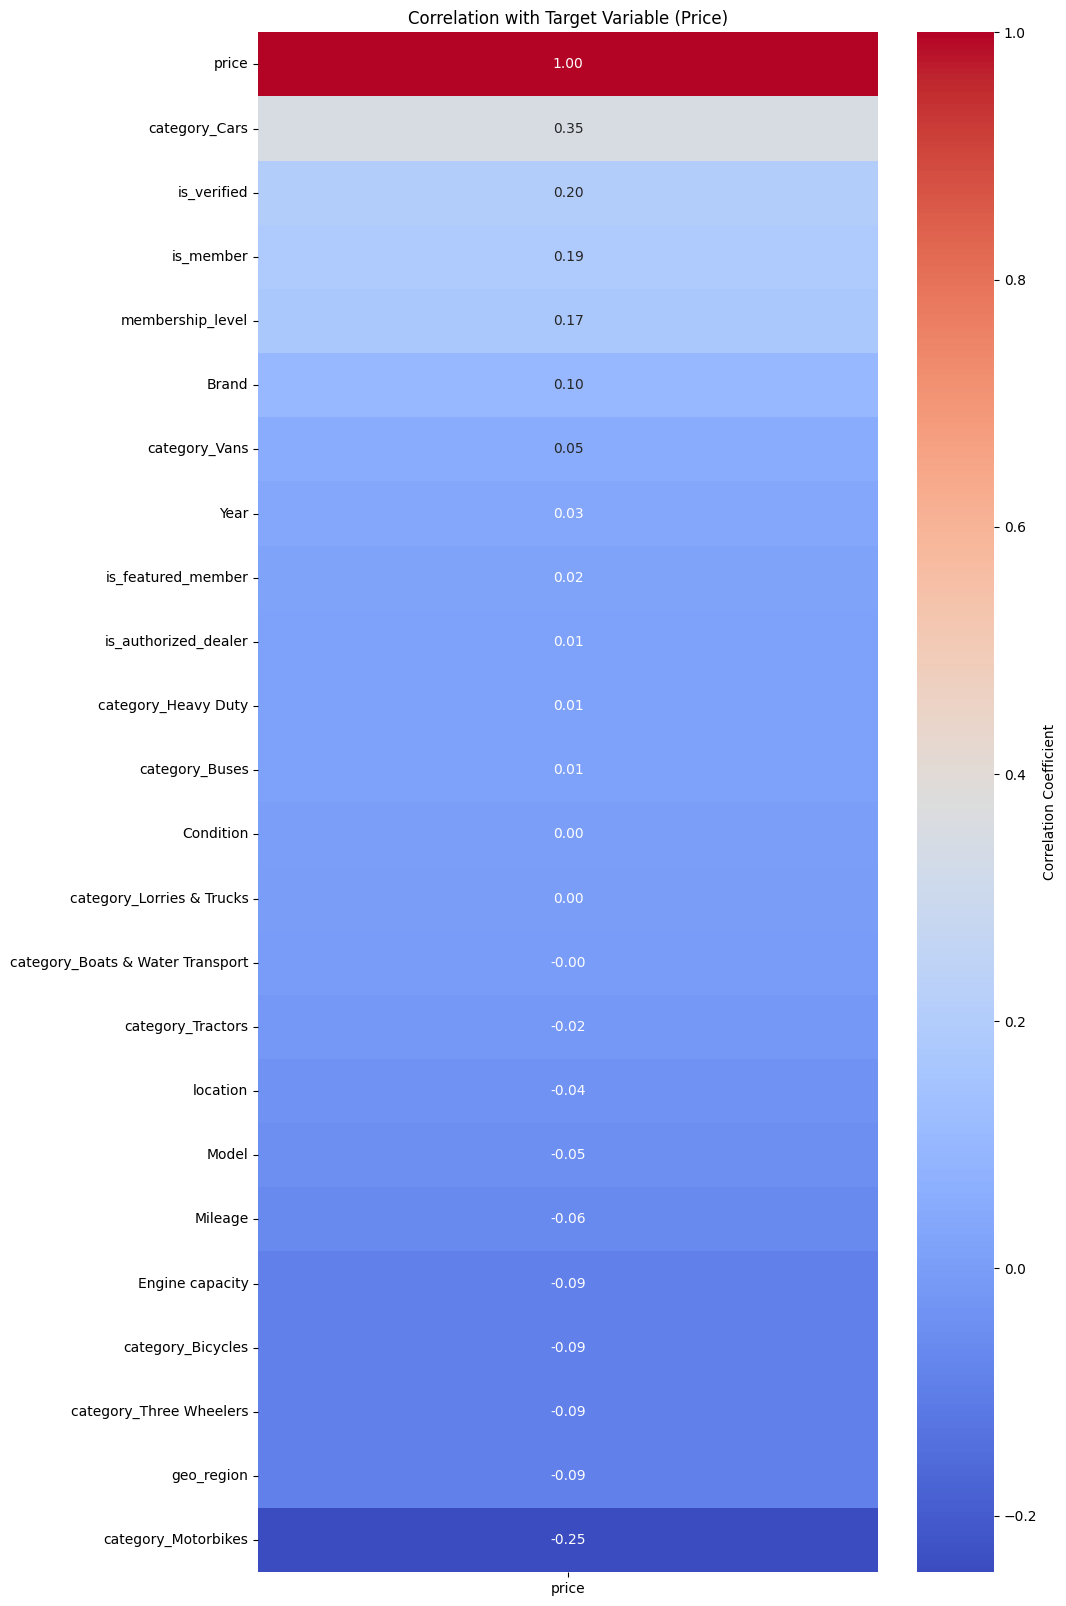

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df1.corr()
target_correlation = correlation_matrix['price'].sort_values(ascending=False)

plt.figure(figsize=(10, 20))
sns.heatmap(target_correlation.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation with Target Variable (Price)')
plt.show()

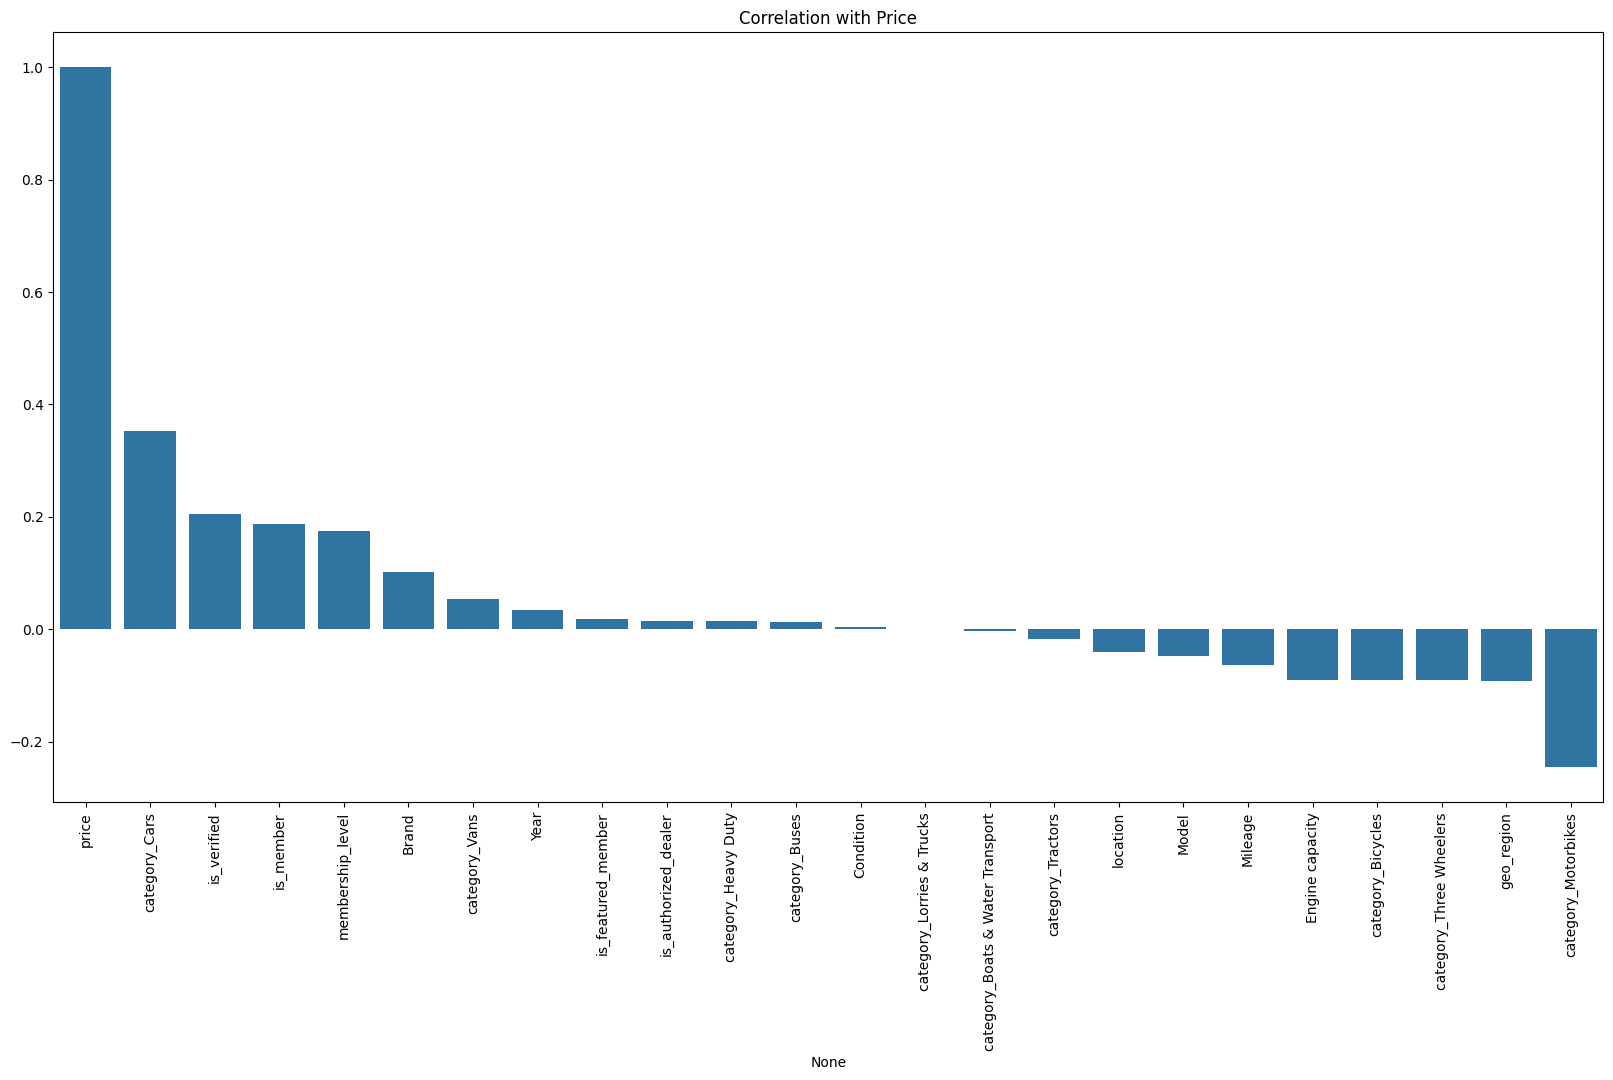

In [378]:
corr_matrix1 = df1.corr()
corr_with_target1 = corr_matrix1['price'].sort_values(ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x=corr_with_target1.index, y=corr_with_target1.values)
plt.xticks(rotation=90)
plt.title('Correlation with Price')
plt.show()

,price,location,geo_region,membership_level,is_member,is_authorized_dealer,is_featured_member,is_verified,Brand,Condition,...,category_Bicycles,category_Boats & Water Transport,category_Buses,category_Cars,category_Heavy Duty,category_Lorries & Trucks,category_Motorbikes,category_Three Wheelers,category_Tractors,category_Vans
price,1.000000,-0.040812,-0.093127,0.174046,0.187376,0.014628,0.018693,0.204635,0.100977,0.003537,...,-0.090853,-0.003880,0.013336,0.352098,0.014626,0.000299,-0.245746,-0.091302,-0.017081,0.052861
location,-0.040812,1.000000,0.004385,-0.032848,-0.031340,-0.017386,0.007141,-0.019247,0.003240,0.012676,...,0.005038,0.004078,0.001529,-0.000368,0.008596,0.004869,0.001331,0.005412,-0.004339,-0.023107
geo_region,-0.093127,0.004385,1.000000,-0.250878,-0.249133,-0.010580,-0.005967,-0.189616,-0.039613,0.042595,...,-0.025957,0.009429,0.015995,-0.167550,0.059286,0.053390,0.080456,0.017075,0.102363,0.017236
membership_level,0.174046,-0.032848,-0.250878,1.000000,0.970662,0.031631,0.017841,0.734471,-0.003877,-0.094488,...,-0.131011,-0.021299,-0.030158,0.138354,-0.016138,-0.054025,-0.000189,-0.046287,-0.059252,0.043215
is_member,0.187376,-0.031340,-0.249133,0.970662,1.000000,0.029950,0.016892,0.717706,0.002563,-0.098870,...,-0.131252,-0.021531,-0.029168,0.157811,-0.009154,-0.046435,-0.018402,-0.052328,-0.056139,0.038763
is_authorized_dealer,0.014628,-0.017386,-0.010580,0.031631,0.029950,1.000000,-0.000145,0.039050,0.018041,0.002672,...,-0.004256,-0.000645,-0.001037,0.020795,-0.001678,0.002757,-0.012887,-0.005490,-0.001923,-0.002276
is_featured_member,0.018693,0.007141,-0.005967,0.017841,0.016892,-0.000145,1.000000,0.022025,0.004328,-0.000828,...,-0.002401,-0.000364,-0.000585,0.014472,-0.000946,-0.002476,-0.007269,-0.003096,-0.001085,-0.002184
is_verified,0.204635,-0.019247,-0.189616,0.734471,0.717706,0.039050,0.022025,1.000000,0.026475,-0.063898,...,-0.103566,-0.014032,-0.022419,0.182007,0.004521,-0.032610,-0.048596,-0.075271,-0.040673,0.023582
Brand,0.100977,0.003240,-0.039613,-0.003877,0.002563,0.018041,0.004328,0.026475,1.000000,-0.038188,...,0.084234,0.060676,-0.010209,0.307152,0.010622,0.071683,-0.227814,-0.381967,0.043787,0.188936
Condition,0.003537,0.012676,0.042595,-0.094488,-0.098870,0.002672,-0.000828,-0.063898,-0.038188,1.000000,...,-0.204485,-0.038999,0.005541,0.055321,-0.031253,0.026948,0.010547,0.055866,-0.011044,0.010870


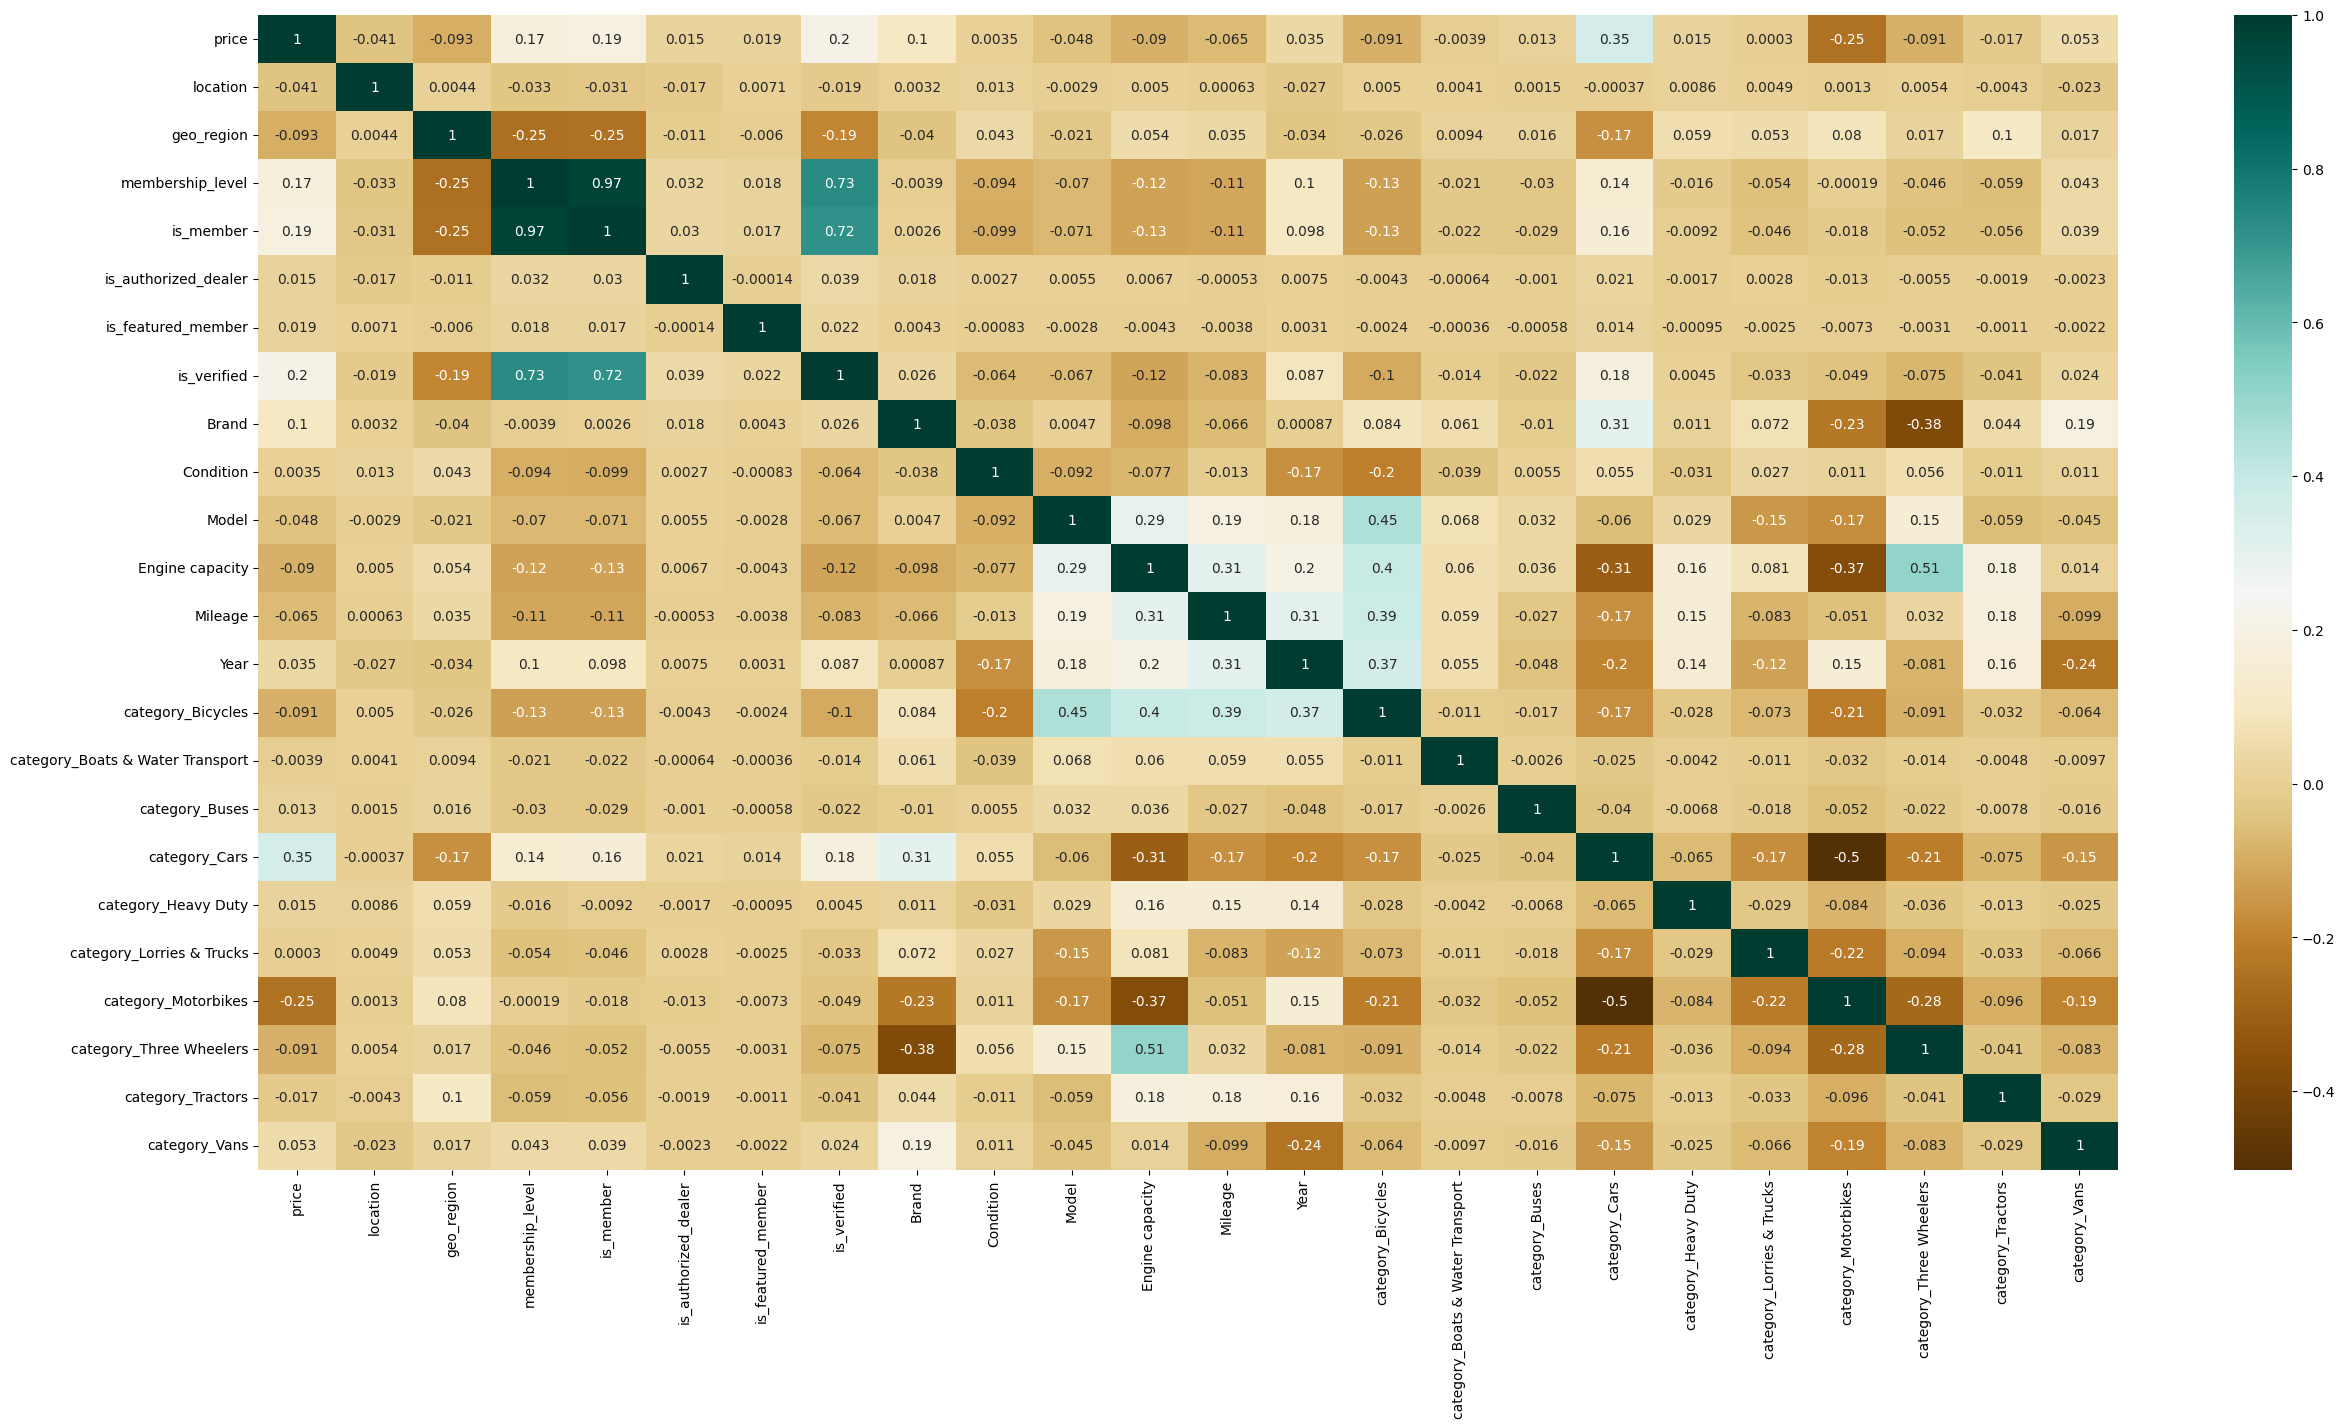

In [379]:
plt.figure(figsize=(30,15))
corr1 = df1.corr()
sns.heatmap(corr1, cmap="BrBG",annot=True)
corr1

# Apply feature selection techniques such as Recursive Feature Elimination (RFE) or Lasso Regression.

In [380]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Splitting the data into features and target variable
X = df1.drop('price', axis=1)
y = df1['price']

# Initializing the linear regression model
linear_model = LinearRegression()

# Initializing RFE with the linear model and the number of features to select
rfe = RFE(estimator=linear_model, n_features_to_select=10)  # You can choose the number of features to select

# Fitting RFE
rfe.fit(X, y)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features_rfe)

Selected Features by RFE: Index(['category_Bicycles', 'category_Boats & Water Transport',
       'category_Buses', 'category_Cars', 'category_Heavy Duty',
       'category_Lorries & Trucks', 'category_Motorbikes',
       'category_Three Wheelers', 'category_Tractors', 'category_Vans'],
      dtype='object')


In [381]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Initializing Lasso model with alpha (regularization strength)
lasso = Lasso(alpha=0.1, max_iter=10000)

# Fitting Lasso
lasso.fit(X, y)

# Using SelectFromModel to get the selected features
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X.columns[model.get_support()]
print("Selected Features by Lasso:", selected_features_lasso)

Selected Features by Lasso: Index([], dtype='object')


In [382]:
# Intersection of features selected by RFE and Lasso
final_selected_features = list(set(selected_features_rfe) & set(selected_features_lasso))
print("Final Selected Features:", final_selected_features)

# Creating a new dataframe with only the selected features
X_selected = X[final_selected_features]

# Adding the target variable to this dataframe
df_final = pd.concat([X_selected, y], axis=1)

Final Selected Features: []


# Train at least three different regression models 

In [383]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df1.drop('price', axis=1)
y = df1['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LinearRegression

In [384]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions (just for reference)
y_pred_lr = linear_model.predict(X_test)

y_pred_lr

array([ 0.0001154 , -0.00253597,  0.00033864, ..., -0.00019631,
       -0.00111736,  0.00061684])

In [385]:
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = linear_model.score(X_test, y_test)
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R²:", lr_r2)

Linear Regression RMSE: 0.0027520210643267023
Linear Regression R²: 0.3282594730079238


# Random Forest

In [386]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions (just for reference)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([3.71029581e-05, 1.41656061e-04, 4.27438889e-04, ...,
       1.30336059e-05, 8.70803031e-05, 2.61858535e-03])

In [387]:
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = rf_model.score(X_test, y_test)
print("Random Forest Regressor RMSE:", rf_rmse)
print("Random Forest Regressor R²:", rf_r2)

Random Forest Regressor RMSE: 0.0016710073835825697
Random Forest Regressor R²: 0.7523406202157905


# Gradient Boosting

In [388]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the gradient boosting regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions (just for reference)
y_pred_gb = gb_model.predict(X_test)
y_pred_gb

array([-0.00011729, -0.00011566,  0.00026654, ...,  0.00012491,
        0.00039719,  0.00198534])

In [389]:
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
gb_r2 = gb_model.score(X_test, y_test)
print("Gradient Boosting Regressor RMSE:", gb_rmse)
print("Gradient Boosting Regressor R²:", gb_r2)

Gradient Boosting Regressor RMSE: 0.0015660571245311682
Gradient Boosting Regressor R²: 0.7824729638946141


# Evaluate the models using cross-validation.

In [390]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# Define the RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, squared=False)

In [391]:
# Cross-validation for Linear Regression
lr_rmse_scores = cross_val_score(linear_model, X, y, cv=5, scoring=rmse_scorer)
lr_r2_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
print("Cross-validated Linear Regression RMSE:", lr_rmse_scores.mean())
print("Cross-validated Linear Regression R²:", lr_r2_scores.mean())

Cross-validated Linear Regression RMSE: 0.003699210592219735
Cross-validated Linear Regression R²: 0.254578819847423


In [392]:
# Cross-validation for Random Forest Regressor
rf_rmse_scores = cross_val_score(rf_model, X, y, cv=5, scoring=rmse_scorer)
rf_r2_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Cross-validated Random Forest Regressor RMSE:", rf_rmse_scores.mean())
print("Cross-validated Random Forest Regressor R²:", rf_r2_scores.mean())

Cross-validated Random Forest Regressor RMSE: 0.0030254784650217193
Cross-validated Random Forest Regressor R²: 0.49822385536293357


In [393]:
# Cross-validation for Gradient Boosting Regressor
gb_rmse_scores = cross_val_score(gb_model, X, y, cv=5, scoring=rmse_scorer)
gb_r2_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
print("Cross-validated Gradient Boosting Regressor RMSE:", gb_rmse_scores.mean())
print("Cross-validated Gradient Boosting Regressor R²:", gb_r2_scores.mean())

Cross-validated Gradient Boosting Regressor RMSE: 0.00275286050102412
Cross-validated Gradient Boosting Regressor R²: 0.609766328769755


# Use Grid Search or Random Search for hyperparameter optimization.

In [394]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Sample a smaller subset of the data for tuning
X_sample = X.sample(frac=0.2, random_state=42)
y_sample = y.loc[X_sample.index]

# Define the optimized parameter grid for Random Forest Regressor
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Initialize the Random Search with fewer iterations
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, cv=3, scoring=rmse_scorer, n_jobs=-1, n_iter=20, random_state=42)

# Fit the Random Search model on the smaller subset
rf_random_search.fit(X_sample, y_sample)

# Get the best parameters and scores
rf_best_params_random = rf_random_search.best_params_
rf_best_score_random = -rf_random_search.best_score_

print("Best parameters for Random Forest (Random Search):", rf_best_params_random)
print("Best RMSE for Random Forest (Random Search):", rf_best_score_random)

# Train the best model with tuned hyperparameters on the full dataset
best_rf_model_random = RandomForestRegressor(**rf_best_params_random, random_state=42)
best_rf_model_random.fit(X, y)

# Evaluate the tuned model using cross-validation
rf_rmse_scores_random = cross_val_score(best_rf_model_random, X, y, cv=5, scoring=rmse_scorer)
rf_r2_scores_random = cross_val_score(best_rf_model_random, X, y, cv=5, scoring='r2')

print("Tuned Random Forest (Random Search) RMSE:", rf_rmse_scores_random.mean())
print("Tuned Random Forest (Random Search) R²:", rf_r2_scores_random.mean())


Best parameters for Random Forest (Random Search): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best RMSE for Random Forest (Random Search): -0.0012953705700377485
Tuned Random Forest (Random Search) RMSE: 0.0029837015858099245
Tuned Random Forest (Random Search) R²: 0.5162439437999613


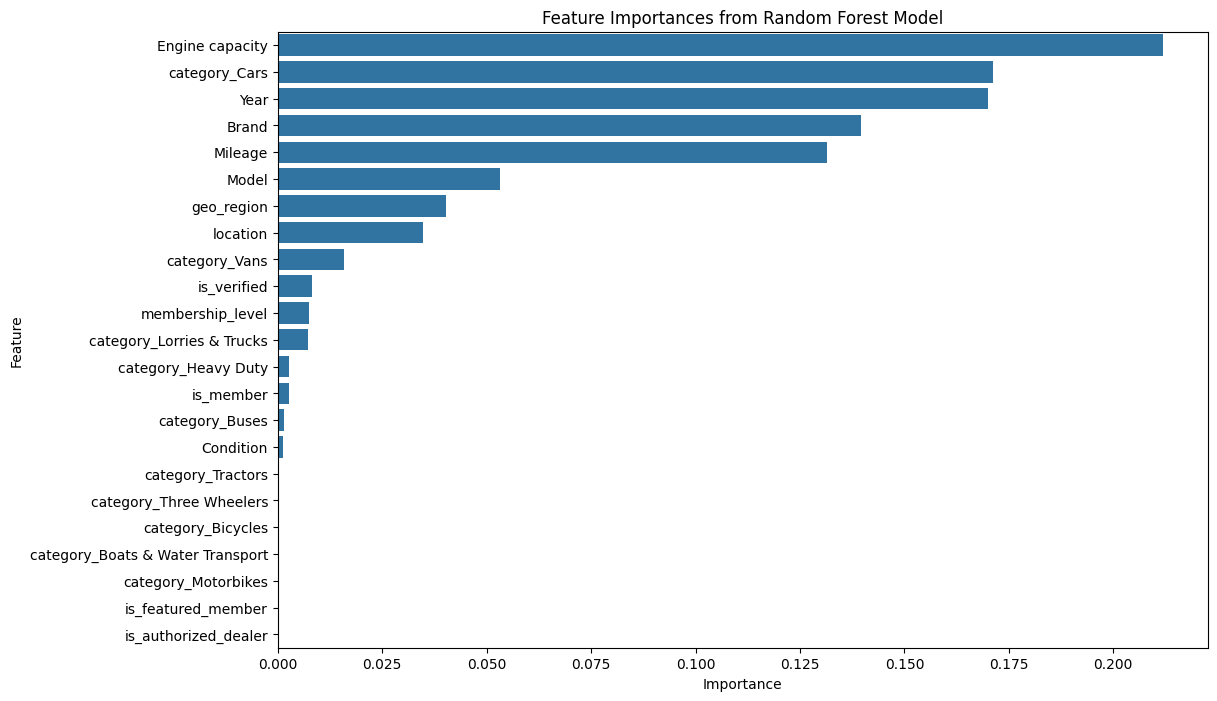

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the best Random Forest model
feature_importances = best_rf_model_random.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [396]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the model
gb_model = GradientBoostingRegressor()

# Define the hyperparameter space with smaller ranges
param_distributions = {
    'n_estimators': randint(50, 100),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(1, 5),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.7, 0.3)
}

# Initialize RandomizedSearchCV with a smaller number of iterations
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_distributions,
    n_iter=20,  # Reduced number of iterations
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Fit Randomized Search
gb_random_search.fit(X, y)

# Get the best parameters and scores
best_gb_model = gb_random_search.best_estimator_
print("Best Hyperparameters for Gradient Boosting: ", gb_random_search.best_params_)
print("Best R² Score for Gradient Boosting: ", gb_random_search.best_score_)


Best Hyperparameters for Gradient Boosting:  {'learning_rate': 0.09500385777897993, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 97, 'subsample': 0.8112454756594799}
Best R² Score for Gradient Boosting:  0.640461476097493


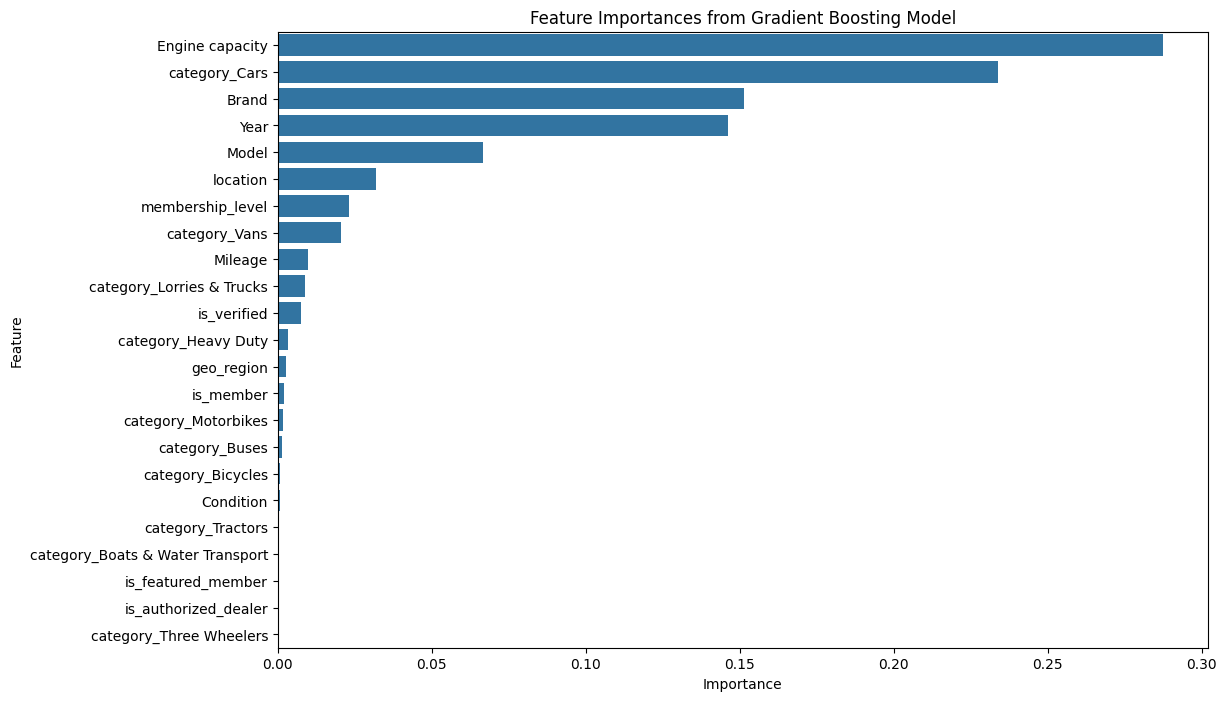

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the best Gradient Boosting model
feature_importances = best_gb_model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Compare the models based on RMSE, MAE, and R².

In [ ]:
from sklearn.metrics import mean_absolute_error

lr_mae_scores = mean_absolute_error(y_test, y_pred_lr)
rf_mae_scores = mean_absolute_error(y_test, y_pred_rf)
gb_mae_scores = mean_absolute_error(y_test, y_pred_gb)

In [401]:
# Create a table to compare the models

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
rmse = [lr_rmse, rf_rmse, gb_rmse]
mae = [lr_mae_scores, rf_mae_scores, gb_mae_scores]
r2 = [lr_r2, rf_r2, gb_r2]

table = pd.DataFrame({'Model': models, 'RMSE': rmse, 'MAE': mae, 'R²': r2})

# Print the table
print(table.to_string())

               Model      RMSE       MAE        R²
0  Linear Regression  0.002752  0.001189  0.328259
1      Random Forest  0.001671  0.000230  0.752341
2  Gradient Boosting  0.001566  0.000532  0.782473


# Select the best-performing model.

In [ ]:
# Based on the table, the Gradient Boosting model has the lowest RMSE, MAE, and highest R², indicating that it is the best-performing model.
best_model = gb_model